In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/peiyuanp/Desktop/Galaxy_Summer2021/query_results/processed_toolid/numusers_all.csv',names=['date','num_users','tool_name_version'],skiprows = 1)

In [3]:
# drops all the NaN values
df = df.dropna()

# removes leading and trailing whitespaces in the date column
df['date'] = df['date'].str.strip()

# removes leading and trailing whitespaces in the tool_name_version column
df['tool_name_version'] = df['tool_name_version'].str.strip()

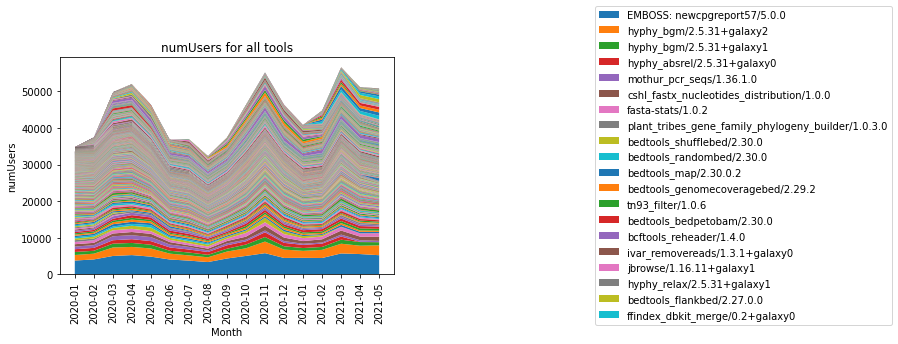

In [4]:
tools = df['tool_name_version'].drop_duplicates()
x = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07',
     '2020-08','2020-09','2020-10',
    '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']


legends = []

result = []
for tool in tools:
    y = []
    legends.append(tool)
    df2 = df[df['tool_name_version'] == tool]
    index = 0;
    for i in range(17):
        if x[i] not in df2['date'].tolist():
            y.append(0)
        else:
            y.append(pd.to_numeric(df2['num_users'].iloc[index]))
            index = index + 1
    result.append(y)

plt.stackplot(x,result,labels=legends[-20:])
plt.xlabel('Month')
plt.ylabel('numUsers')
plt.title('numUsers for all tools')

plt.xticks(rotation = 90)
plt.legend(loc='right',bbox_to_anchor=(2.5, 0.5),ncol = 1)


plt.savefig('numusers_all_tools.png',bbox_inches = "tight")